Prepare Data for Classifier
===


In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
import pickle
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

### Load data set with two classes: vehicles and non-vehicles

In [2]:
# Load data from different sets
# There is large differencr between GTI sets and KITTI set.
# GTI sets are generated from video sequence and contain quite a lot of similar samples.
# For improvement of optimization of classifier and accuracy estimation it needs to remove similarities and
# combine car train/val/test sets from different car sets. 
cars1 = glob.glob('./vehicles/GTI_Far/*.png')
cars2 = glob.glob('./vehicles/GTI_MiddleClose/*.png')
cars3 = glob.glob('./vehicles/GTI_Left/*.png')
cars4 = glob.glob('./vehicles/GTI_Right/*.png')
cars5 = glob.glob('./vehicles/KITTI_extracted/*.png')
notcars = glob.glob('./non-vehicles/Extras/*.png')
notcars += glob.glob('./non-vehicles/GTI/*.png')

cars = cars1 + cars2 + cars3 + cars4 + cars5

In [3]:
print('Number of samples in cars1 set: ', len(cars1))
print('Number of samples in cars2 set: ', len(cars2))
print('Number of samples in cars3 set: ', len(cars3))
print('Number of samples in cars4 set: ', len(cars4))
print('Number of samples in cars5 set: ', len(cars5))

Number of samples in cars1 set:  834
Number of samples in cars2 set:  419
Number of samples in cars3 set:  909
Number of samples in cars4 set:  664
Number of samples in cars5 set:  5966


### Two classes are quite balanced

In [4]:
print('Number of samples in cars set: ', len(cars))
print('Number of samples in notcars set: ', len(notcars))

Number of samples in cars set:  8792
Number of samples in notcars set:  8968


### Vehicle and Non-Vehicle examples

In [7]:
# Read in car / not-car images
car_ind = 100
notcar_ind = 10
car_image = plt.imread(cars[car_ind])
notcar_image = plt.imread(notcars[notcar_ind])
print('a car: ', cars[car_ind])
print('not a car :', notcars[notcar_ind])

a car:  ./vehicles/GTI_Far\image0151.png
not a car : ./non-vehicles/Extras\extra1007.png


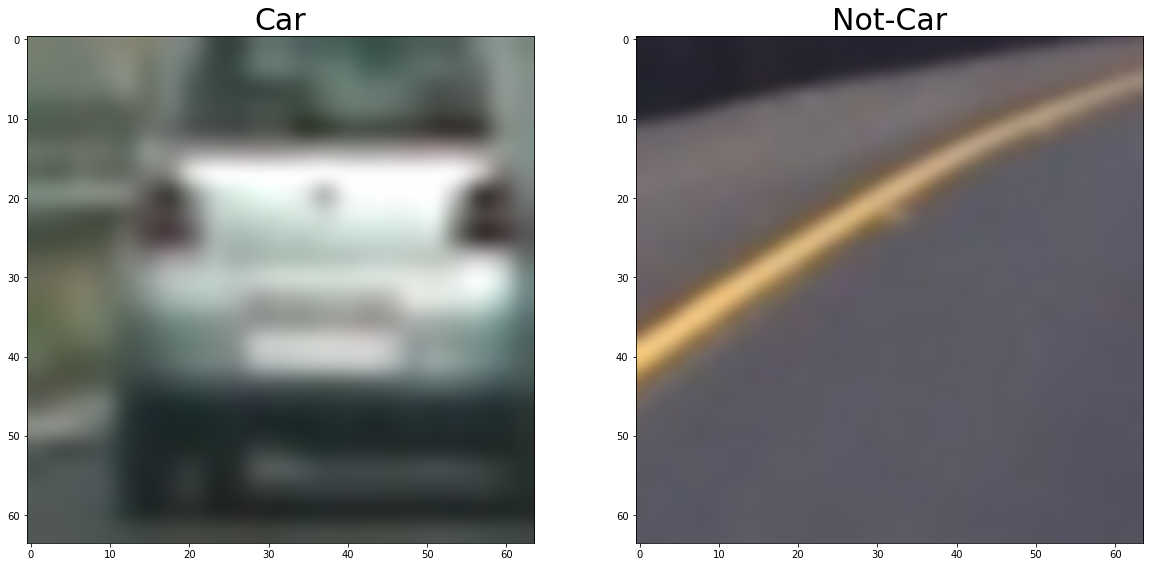

In [9]:
# Plot the examples
font_size=30
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Car', fontsize=font_size)
ax1.imshow(car_image, interpolation="bicubic")
ax2.imshow(notcar_image, interpolation="bicubic")
ax2.set_title('Not-Car', fontsize=font_size)
plt.show()

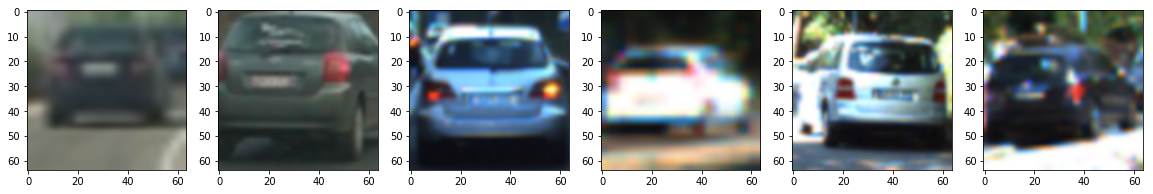

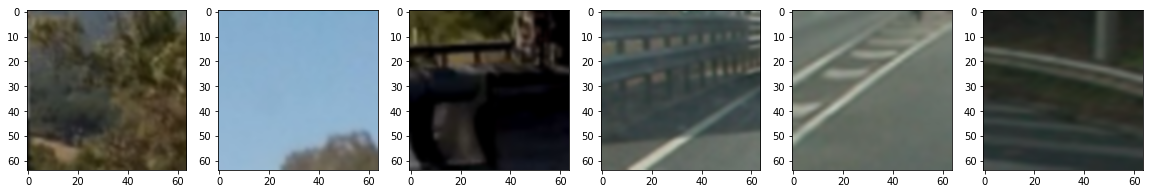

In [50]:
def draw_samples(dset, inds):
    font_size=15
    f, ax = plt.subplots(1, len(inds), figsize=(20,10))
    for i in range(len(inds)):
        ax[i].imshow(plt.imread(dset[inds[i]]), interpolation="bicubic")
    plt.show()
    pass

car_i=np.array((1,2000,5000,6500,7000,8000))
notcar_i=np.array((1,1000,2000,5200,6300,8050))

draw_samples(cars, car_i)
draw_samples(notcars, notcar_i)